In [1]:
# Importo librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
from google.colab import files

# Subo el archivo manualmente
uploaded = files.upload()

# Cargo el dataset
df = pd.read_csv("players_22.csv")

Saving players_22.csv to players_22 (1).csv


<ipython-input-2-2f6880abad11>:7: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("players_22.csv")


In [3]:
# Muestro las primeras filas
df.head()

# Información general
df.info()

# Estadísticas generales
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [7]:
# Verifica valores nulos
print(df.isnull().sum())

# Rellena valores nulos en columnas clave
df['value_eur'].fillna(df['value_eur'].median(), inplace=True)
df['wage_eur'].fillna(df['wage_eur'].median(), inplace=True)

# Converti valores de altura y peso a numéricos
df['height_cm'] = pd.to_numeric(df['height_cm'], errors='coerce')
df['weight_kg'] = pd.to_numeric(df['weight_kg'], errors='coerce')

# Confirma limpieza
df.info()


sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


<ipython-input-7-fffeb1d317f6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['value_eur'].fillna(df['value_eur'].median(), inplace=True)
<ipython-input-7-fffeb1d317f6>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

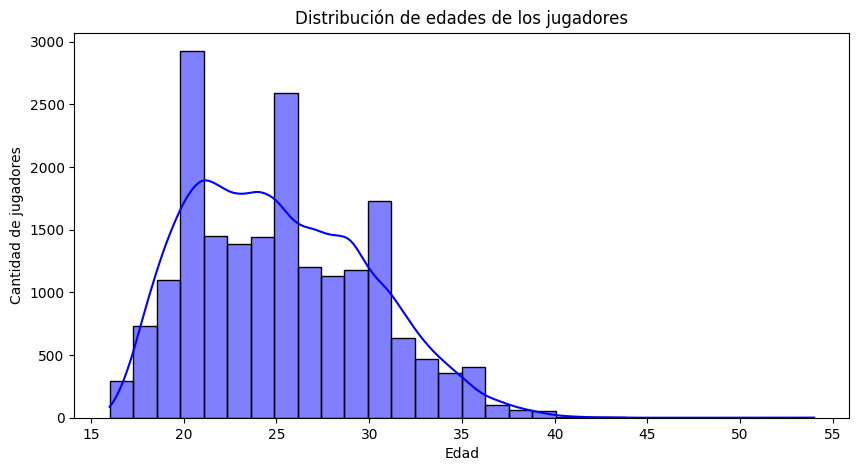

In [8]:
#Distribuccion de Edades
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Distribución de edades de los jugadores')
plt.xlabel('Edad')
plt.ylabel('Cantidad de jugadores')
plt.show()


<ipython-input-10-826d6297bf7e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


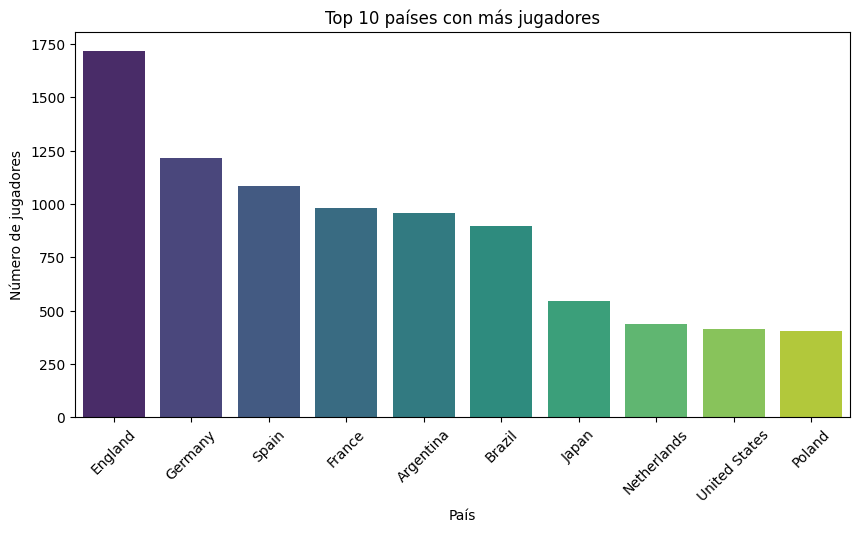

In [10]:
#Top 10 países con más jugadores
top_countries = df['nationality_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 países con más jugadores')
plt.xlabel('País')
plt.ylabel('Número de jugadores')
plt.show()

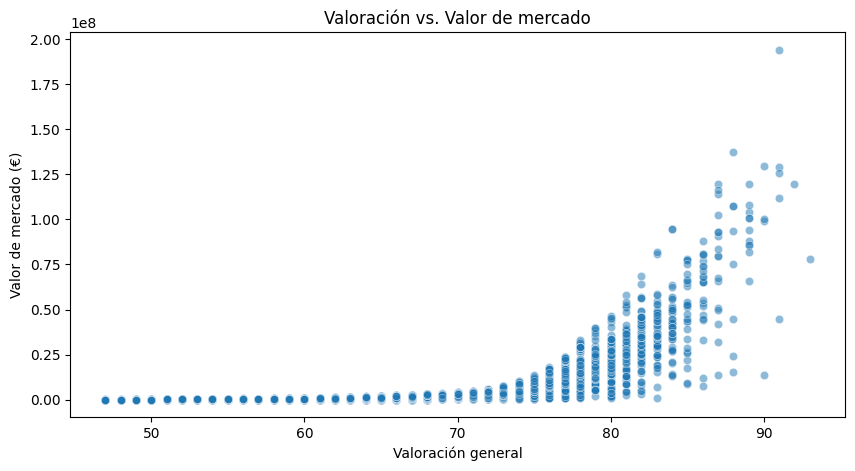

In [11]:
#Relacion entre Valoracion y Valor de Mercado
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['overall'], y=df['value_eur'], alpha=0.5)
plt.title('Valoración vs. Valor de mercado')
plt.xlabel('Valoración general')
plt.ylabel('Valor de mercado (€)')
plt.show()

<ipython-input-12-43ae2194bc29>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_players.index, y=best_players.values, palette='coolwarm')


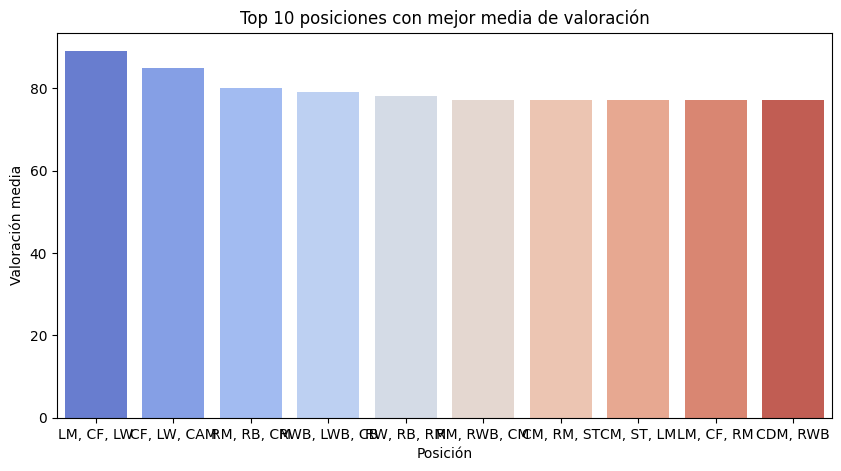

In [12]:
# Mejores jugadores por posición
best_players = df.groupby('player_positions')['overall'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=best_players.index, y=best_players.values, palette='coolwarm')
plt.title('Top 10 posiciones con mejor media de valoración')
plt.xlabel('Posición')
plt.ylabel('Valoración media')
plt.show()

## Predicción del valor de mercado

In [13]:
# Seleccionar características relevantes
features = ['overall', 'age', 'potential']
X = df[features]
y = df['value_eur']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")
print(f"Coeficiente de determinación (R²): {r2}")


Error absoluto medio (MAE): 2993685.4274445325
Coeficiente de determinación (R²): 0.35373535882514495
